In [7]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
def f(x):
    return 1 / (1 + (10*x)**2)

# Question 1

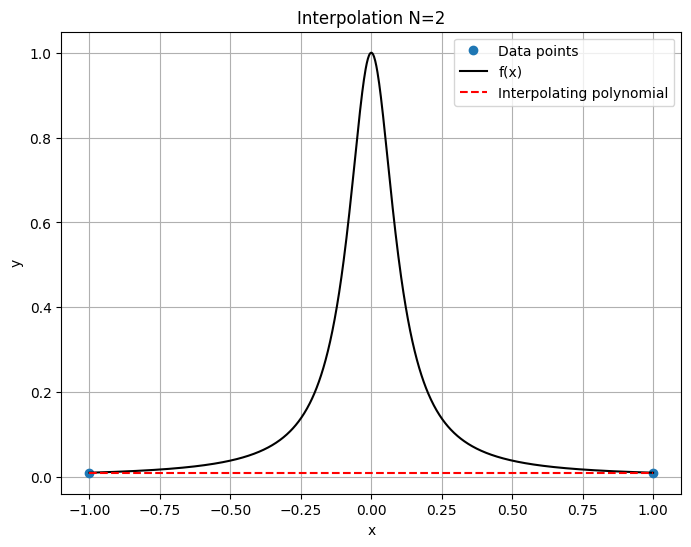

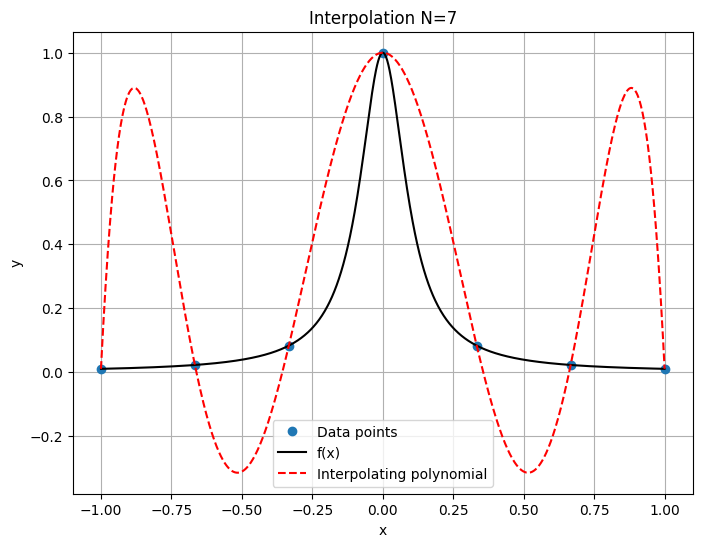

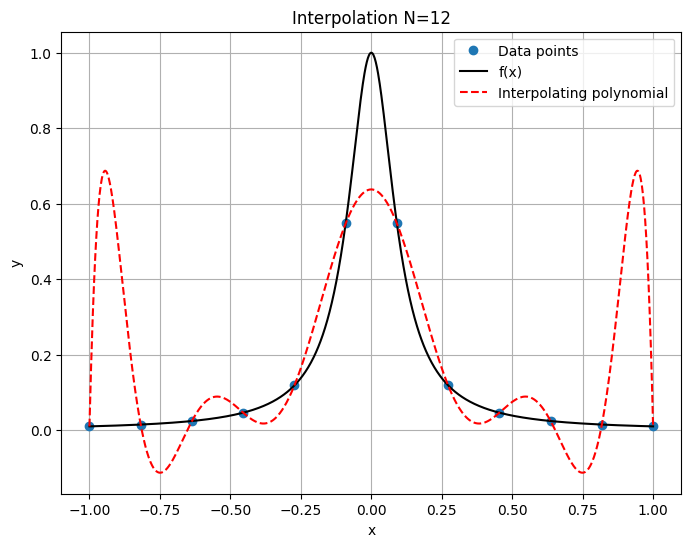

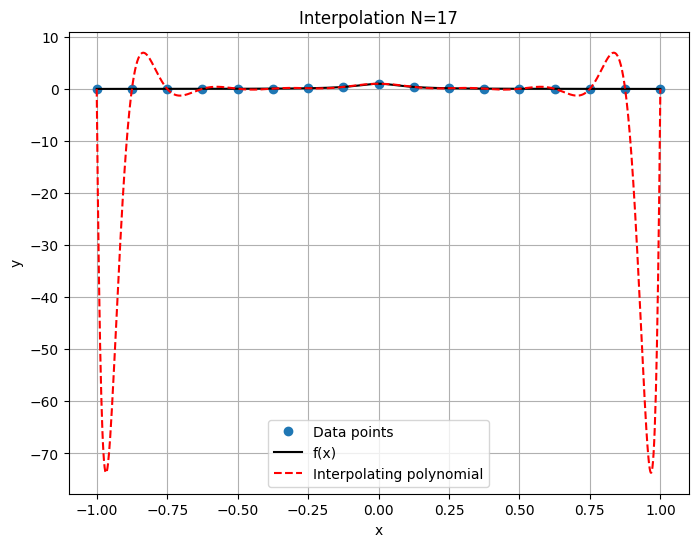

In [13]:
for N in range(2, 20, 5):

    x = np.linspace(-1, 1, N)
    y = f(x)

    V = np.vander(x, N)


    c = np.linalg.solve(V, y)

    x_vals = np.linspace(-1, 1, 1001)
    y_vals = f(x_vals)


    poly_vals = np.polyval(c, x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Data points')
    plt.plot(x_vals, y_vals, 'k-',label='f(x)')
    plt.plot(x_vals, poly_vals,'r--', label='Interpolating polynomial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolation N={N}')
    plt.legend()
    plt.grid()
    plt.show()

# Question 2

In [42]:
def compute_barycentric_weights(x_nodes):
    N = len(x_nodes)
    w = np.ones(N)
    for j in range(N):
        for i in range(N):
            if i != j:
                w[j] /= (x_nodes[j] - x_nodes[i])
    return w

def barycentric_interpolation(x_eval, x_nodes, f_nodes, w):
    x_eval = np.asarray(x_eval)
    p = np.empty_like(x_eval, dtype=float)
    for idx, x_val in np.ndenumerate(x_eval):
        diff = x_val - x_nodes
        if np.any(np.abs(diff) < 1e-14):
            p[idx] = f_nodes[np.argmin(np.abs(diff))]
        else:
            terms = w / diff
            p[idx] = np.sum(terms * f_nodes) / np.sum(terms)
    return p

### Small N = 14 

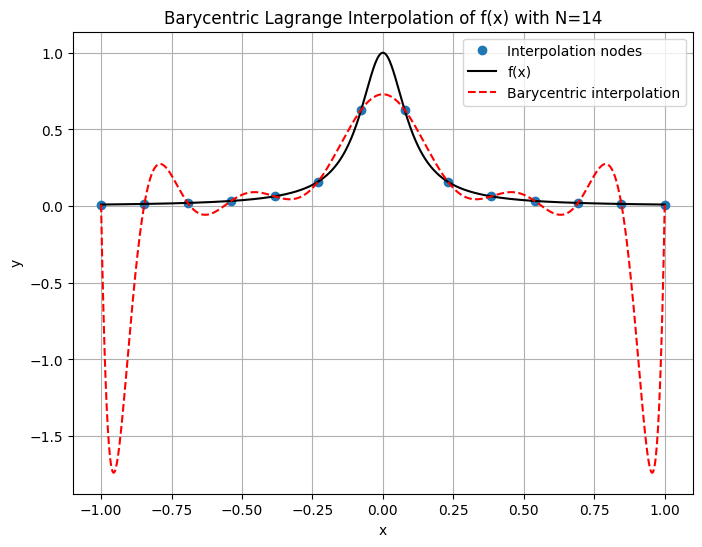

In [29]:
N=14
x_nodes = np.linspace(-1, 1, N)
f_nodes = f(x_nodes)

weights = compute_barycentric_weights(x_nodes)

x_fine = np.linspace(-1, 1, 1001)
p_fine = barycentric_interpolation(x_fine, x_nodes, f_nodes, weights)
f_fine = f(x_fine)

plt.figure(figsize=(8, 6))
plt.plot(x_nodes, f_nodes, 'o', label='Interpolation nodes')
plt.plot(x_fine, f_fine, 'k-',label='f(x)')
plt.plot(x_fine, p_fine,'r--' ,label='Barycentric interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Barycentric Lagrange Interpolation of f(x) with N={N}')
plt.legend()
plt.grid(True)
plt.show()


### Large N Behavior

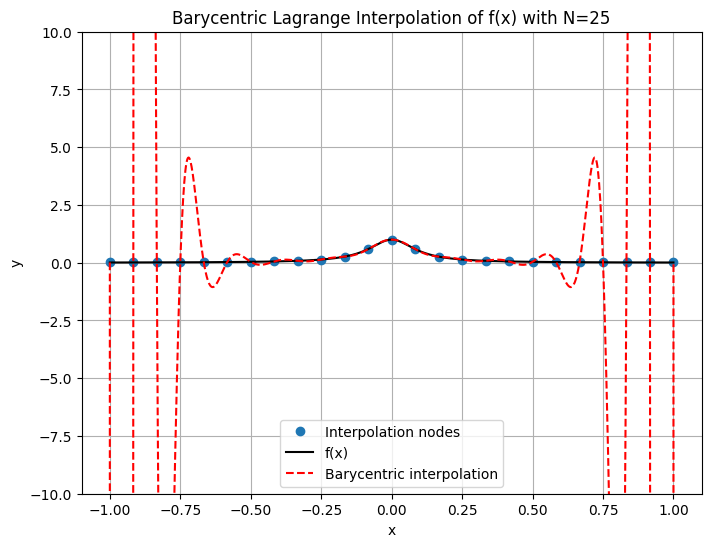

In [53]:
N=25
x_nodes = np.linspace(-1, 1, N)
f_nodes = f(x_nodes)

weights = compute_barycentric_weights(x_nodes)

x_fine = np.linspace(-1, 1, 1001)
p_fine = barycentric_interpolation(x_fine, x_nodes, f_nodes, weights)
f_fine = f(x_fine)

plt.figure(figsize=(8, 6))
plt.plot(x_nodes, f_nodes, 'o', label='Interpolation nodes')
plt.plot(x_fine, f_fine, 'k-',label='f(x)')
plt.plot(x_fine, p_fine,'r--' ,label='Barycentric interpolation')
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Barycentric Lagrange Interpolation of f(x) with N={N}')
plt.legend()
plt.grid(True)
plt.show()


# Question 3 

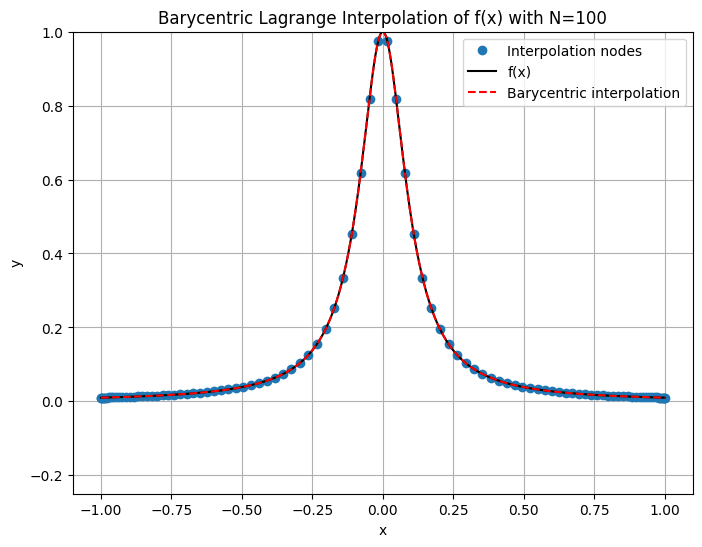

In [60]:
for N in range(100,105,5):
    j = np.arange(1, N+1)
    x_nodes = np.cos((2*j - 1) * np.pi / (2*N))

    f_nodes = f(x_nodes)

    weights = compute_barycentric_weights(x_nodes)

    x_fine = np.linspace(-1, 1, 1001)
    p_fine = barycentric_interpolation(x_fine, x_nodes, f_nodes, weights)
    f_fine = f(x_fine)

    plt.figure(figsize=(8, 6))
    plt.plot(x_nodes, f_nodes, 'o', label='Interpolation nodes')
    plt.plot(x_fine, f_fine, 'k-',label='f(x)')
    plt.plot(x_fine, p_fine,'r--' ,label='Barycentric interpolation')
    plt.ylim([-0.25,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Barycentric Lagrange Interpolation of f(x) with N={N}')
    plt.legend()
    plt.grid(True)
    plt.show()

